<a href="https://colab.research.google.com/github/BharatiChaudhury/Fractional-Cover-of-Green-canopy-soil-and-shadow-/blob/main/K_Means_cluster_For_Percentage_of_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [ ]:
from PIL import Image
import PIL 
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving 04.jpg to 04.jpg


In [ ]:
img = PIL.Image.open('04.jpg')

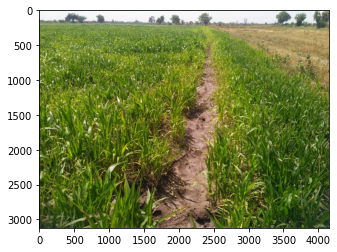

In [ ]:
plt.imshow(img) 
plt.show()

In [ ]:
from numpy import asarray
pix=asarray(img)

In [ ]:
print("The type of this input is {}".format(type(pix)))
print("Shape: {}".format(pix.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (3120, 4160, 3)


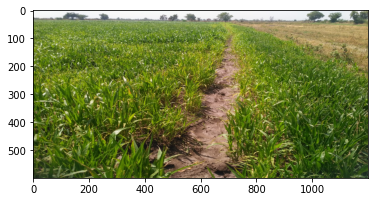

In [ ]:
resized_image = cv2.resize(pix, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    vectorized=np.float32(modified_image) #Added
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #Added
    ret,label,center=cv2.kmeans(vectorized,10,None,criteria,10,cv2.KMEANS_PP_CENTERS)#10 and 6 Added
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    print(labels)
    return rgb_colors

[2 2 2 ... 3 0 0]


[array([80.57074325, 99.05548152, 24.37794535]),
 array([179.0040716 , 165.43265351, 118.70328663]),
 array([240.31299393, 241.83661092, 241.31244257]),
 array([46.09418054, 63.80326518, 12.25925997]),
 array([137.00824655, 137.48617646,  80.1680499 ]),
 array([114.73828255, 134.22267316,  34.13540626])]

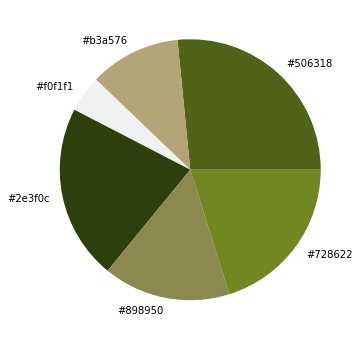

In [ ]:
get_colors(pix, 6, True)